# 4.2 損失関数
## 4.2.1 2 乗和誤差

In [85]:
import numpy as np

def mean_squard_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [86]:
# 「2」を正解とする
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 例 1:「2」の確率が最も高い場合(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squard_error(np.array(y), np.array(t))

0.097500000000000031

In [87]:
# 例 2:「7」の確率が最も高い場合(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squard_error(np.array(y), np.array(t))

0.59750000000000003

## 4.2.2 交差エントロピー誤差

In [88]:
import numpy as np

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [89]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

In [90]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.3025840929945458

## 4.2.3 ミニバッチ学習

In [91]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [92]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [93]:
np.random.choice(60000,10)

array([14338,  3161,  6464, 23577,  5997, 29585, 55716, 23171, 53333,  8882])

## 4.2.4 [バッチ対応版] 交差エントロピー誤差の実装

In [94]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

# 4.3 数値微分
## 4.3.1 微分

In [95]:
# 悪い実装例
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

In [96]:
np.float32(1e-50)

0.0

In [97]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

## 4.3.2 数値微分の例

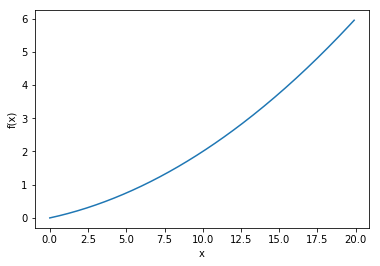

In [98]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0 から 20 まで、 0.1 刻みの x 配列
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [99]:
numerical_diff(function_1, 5)

0.1999999999990898

In [100]:
numerical_diff(function_1, 10)

0.2999999999986347

0.1999999999990898


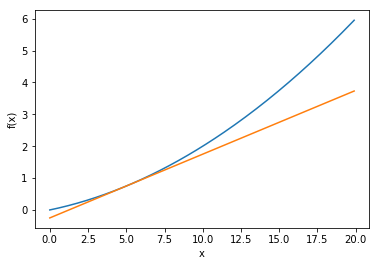

In [6]:
# %load gradient_1d.py
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


## 4.3.3 偏微分

In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # または return np.sum(x**2)

In [8]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [9]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

# 4.4 勾配